### import

In [4]:
import pyautogui as au
import time
import pandas as pd
import re
from os.path import join
import os
import numpy as np
from tqdm import tqdm
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.alert import Alert
# from selenium.webdriver.chrome.options import Options
#from selenium.common.exceptions import NoAlertPresentException, NoSuchWindowException # NoSuchElementException, UnexpectedAlertPresentException, WebDriverException,
import random
from file_function import read_filelist
from datetime import date
# from datetime import timedelta
import traceback
# 정렬순서 : 확정일자(내림), 법원(올림), 사건번호(내림)
import time
import requests
import base64
import pytesseract
from PIL import Image
from io import BytesIO

dtype = {'채무자키':str, '계좌키':str, '가상계좌번호':str, '법조치키':str}

In [2]:
def lwt() : time.sleep(2.5)
def mwt() : time.sleep(1)
def swt() : time.sleep(random.uniform(0.2,0.5))

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver

def con_scourt() :
    driver = set_chrome_driver()
    # driver.get("https://ecfs.scourt.go.kr/psp/index.on?m=PSPA2GM01") # 제증명발급신청. 메인화면 하면 로그인 오류 생김
    driver.get("https://ecfs.scourt.go.kr/psp/index.on")
    
    driver.maximize_window() # 최대화 필수(상단 메뉴 보였다 안 보였다...)
    wait = WebDriverWait(driver, 30) 
    return driver, wait

In [ ]:
driver, wait = con_scourt()

### 엑셀 사건조회

### 단건 사건조회

In [48]:
#######################
법원 = "서울중앙지방법원"
사건번호 = "2012가단249137"
당사자명 = "이오채"
#######################

# 사건구분입력모드 클릭
checkbox = driver.find_element(By.ID, "mf_pmf_content1_cbx_sagunNoGb_input_0")
if not checkbox.is_selected():
    checkbox.click()

# 법원
    # Select 객체 생성
select = Select(driver.find_element(By.ID, "mf_pmf_content1_sbx_cort5"))
    # 텍스트를 가진 옵션 선택
select.select_by_visible_text(법원)
swt()

# 사건번호, 당사자
사건번호_id = "mf_pmf_content1_ibx_csNoFull5"
당사자_input_id = "mf_pmf_content1_ibx_dangNm5"
for id, value in ((사건번호_id, 사건번호), (당사자_input_id, 당사자명)) : 
        # input 요소 찾기
    input_box = driver.find_element(By.ID, id)
        # 입력값 설정
    input_box.clear()  # 기존 값이 있다면 지우기
    input_box.send_keys(value)
    swt()
    
# 조회버튼 클릭
view_button = driver.find_element(By.ID, "mf_pmf_content1_btn_t5Search")
view_button.click()

In [ ]:
import cv2
import numpy as np
from PIL import Image

In [ ]:
# 1. 이미지 요소 찾기
img_elem = driver.find_element(By.ID, "mf_pmf_content1_captchaImg1")

# 2. 직접 캡처 (링크는 보안상 랜덤이미지가 나옴)
img_elem.screenshot("captcha_screenshot.png")

# 1. 이미지 열기
image = Image.open("captcha_screenshot.png")

# 2. 이미지 보기 (주피터 노트북이나 IDE에서 직접 보여줌)
# image.show()

# # 3-1. 이미지 전처리 (흑백 변환)
gray_image = image.convert("L")

# 4. 간단한 이진화 (선택사항, 정확도 향상에 도움)
threshold = 80  # 70 ~ 80 정도에서 잘 돼는 숫자가 있는 것 같다. 그런데 그게 그림마다 다르네. & 나우리에서 본 이미지는 배경이 투명하네. w2image mr10 pb5 class는 이렇다. w2image가 특정프로그램은 아닌지 확인
# 나우리꺼 캡처한 이미지는 아주 잘 읽는다. 전처리를 잘 하는 것이 중요한듯.
bw_image = gray_image.point(lambda x: 0 if x < threshold else 255, '1')
bw_image.show()

# 5. OCR 수행 (숫자 인식에 집중)
custom_config = r'--psm 7 -c tessedit_char_whitelist=0123456789' # 
raw_text = pytesseract.image_to_string(bw_image, config=custom_config)

# 6. 숫자만 추출
captcha_digits = re.sub(r'\D', '', raw_text)

print("OCR 원문:", raw_text.strip())
print("추출된 숫자:", captcha_digits)

OCR 원문: 008518
추출된 숫자: 008518


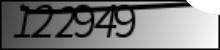

In [70]:
image

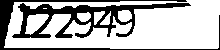

In [72]:
bw_image

In [105]:
# 1. 이미지 요소 찾기
img_elem = driver.find_element(By.ID, "mf_pmf_content1_captchaImg1")

# 2. 직접 캡처 (링크는 보안상 랜덤이미지가 나옴)
img_elem.screenshot("captcha_screenshot.png")

# 1. 이미지 열기
image = Image.open("captcha_screenshot.png")

# 2. 이미지 보기 (주피터 노트북이나 IDE에서 직접 보여줌)
# image.show()

# 3. PIL Image → OpenCV용 numpy 배열로 변환
img_np = np.array(image)
# BGR → Grayscale
gray_image = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# PIL 이미지를 OpenCV 형식으로 변환
pil_image = gray_image
open_cv_image = np.array(pil_image)

# OpenCV 이진화 (Adaptive Threshold)
thresh = cv2.adaptiveThreshold(open_cv_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# OpenCV 이미지 다시 PIL로 변환
bw_image = Image.fromarray(thresh)
# bw_image.show()

scale_factor = 1
width, height = bw_image.size
resized_img = bw_image.resize(
    (bw_image.width * scale_factor, bw_image.height * scale_factor),
    resample=Image.Resampling.LANCZOS
)


# 5. OCR 수행 (숫자 인식에 집중)
custom_config = r'--psm 7 -c tessedit_char_whitelist=0123456789'
raw_text = pytesseract.image_to_string(bw_image, config=custom_config)

# 6. 숫자만 추출
captcha_digits = re.sub(r'\D', '', raw_text)

print("OCR 원문:", raw_text.strip())
print("추출된 숫자:", captcha_digits)

OCR 원문: 
추출된 숫자: 


In [62]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image, ImageOps
from io import BytesIO
import numpy as np
import pytesseract
import re
import time

In [63]:
img_elem.screenshot("captcha_screenshot.png")

# 4. 이미지 열기
image = Image.open("captcha_screenshot.png")

# 5. 전처리 (흑백 + 대비 조정 + threshold 이진화)
gray = image.convert("L")
contrast = ImageOps.autocontrast(gray)
bw_image = contrast.point(lambda x: 0 if x < 100 else 255, '1')  # 임계값은 필요시 조정

# 6. numpy 배열로 변환
img_arr = np.array(bw_image)
column_sums = np.sum(img_arr < 255, axis=0)  # 흰색이 아닌 열 픽셀 수

# 7. 숫자 영역 자동 감지
non_zero_cols = np.where(column_sums > 0)[0]
if len(non_zero_cols) == 0:
    raise ValueError("숫자가 있는 영역을 찾을 수 없습니다.")
start_x, end_x = non_zero_cols[0], non_zero_cols[-1]

# 8. 숫자 영역만 crop
digit_region = bw_image.crop((start_x, 0, end_x, bw_image.height))

# 9. 6등분 후 문자별 OCR 수행
digit_width = (end_x - start_x) // 6
digits = ""

for i in range(6):
    x0 = start_x + i * digit_width
    x1 = x0 + digit_width
    digit_img = bw_image.crop((x0, 0, x1, bw_image.height))
    
    # 문자 확대 (인식률 향상)
    digit_img = digit_img.resize(
        (digit_img.width * 3, digit_img.height * 3),
        resample=Image.Resampling.LANCZOS
    )

    # OCR (단일 숫자)
    text = pytesseract.image_to_string(
        digit_img, 
        config='--psm 10 -c tessedit_char_whitelist=0123456789'
    )
    digits += re.sub(r'\D', '', text)

# 10. 결과 출력
print("최종 추출된 숫자:", digits)

최종 추출된 숫자: 22
